# Task 1

Tagging a Person in Videos Taken in a Situation

In [42]:
import cv2
import numpy as np

# Load video file
video_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\149611-797189096_small.mp4"
cap = cv2.VideoCapture(video_path)

# Check if video loaded successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Initialize background subtractor
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=100)

# Variables for person tracking
person_hist = None
tracked_person_bbox = None

# Kernel for noise removal (morphological operations)
kernel = np.ones((5, 5), np.uint8)

# Function to calculate color histogram (used for person appearance feature extraction)
def calculate_histogram(roi):
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
    cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
    return hist

# Function to track the target person based on appearance
def track_person(frame, hist, bbox):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    back_proj = cv2.calcBackProject([hsv], [0, 1], hist, [0, 180, 0, 256], 1)
    _, tracked_bbox = cv2.meanShift(back_proj, bbox, (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1))
    return tracked_bbox

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to detect moving objects
    fg_mask = back_sub.apply(frame)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)  # Removes small noise
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)  # Closes small gaps in foreground

    # Find contours of moving objects (people)
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if cv2.contourArea(contour) > 2000:  # Filter based on area to remove noise
            # Get bounding box of detected person
            x, y, w, h = cv2.boundingRect(contour)
            person_roi = frame[y:y+h, x:x+w]  # Region of interest (detected person)

            # If person is not being tracked yet, set the tracking target
            if person_hist is None:
                # Set the appearance feature (color histogram) for the detected person
                person_hist = calculate_histogram(person_roi)
                tracked_person_bbox = (x, y, w, h)
            
            # Draw bounding box and label for all detected people (optional)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # If a person is being tracked, update the bounding box using tracking
    if person_hist is not None:
        tracked_person_bbox = track_person(frame, person_hist, tracked_person_bbox)
        x, y, w, h = tracked_person_bbox
        # Draw bounding box around tracked person
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, "Tracked Person", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Display the frame with detection and tracking
    cv2.imshow("Person Detection and Tracking", frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


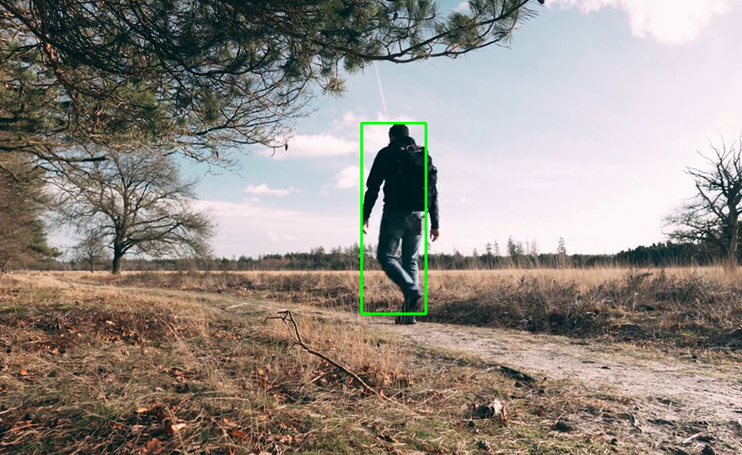

# Task 2
Strategic Marketing – Peak Shopping Duration

Video duration: 10.56 seconds, FPS: 25.0, Total frames: 264
Interval 1: Average people count = 17.19
Interval 2: Average people count = 16.40
Interval 3: Average people count = 15.88
Interval 4: Average people count = 21.60
Interval 5: Average people count = 15.32
Interval 6: Average people count = 14.72
Interval 7: Average people count = 17.28
Interval 8: Average people count = 17.36
Interval 9: Average people count = 14.36
Interval 10: Average people count = 11.24


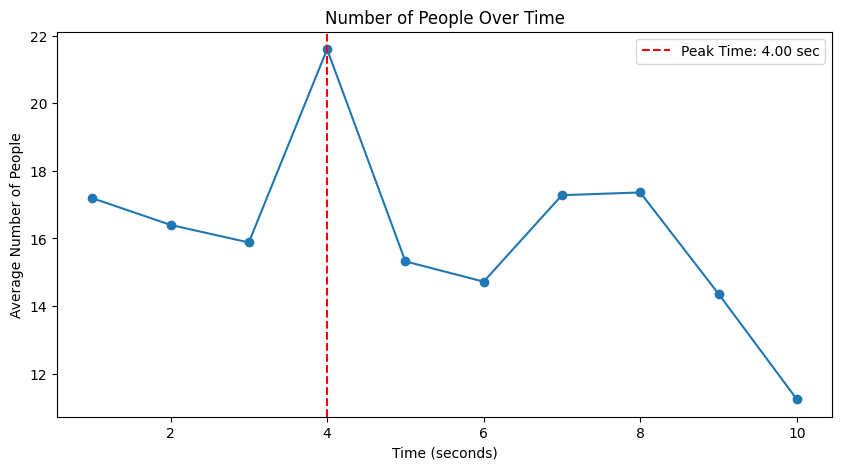

The peak shopping duration occurs at around 4.00 seconds with an average of 21.60 people.


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video
video_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\1625973-hd_1280_720_25fps.mp4"  
cap = cv2.VideoCapture(video_path)

# Check if video is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the video's FPS and duration
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
video_duration = total_frames / fps
print(f"Video duration: {video_duration:.2f} seconds, FPS: {fps}, Total frames: {total_frames}")

# Background subtractor to detect people
back_sub = cv2.createBackgroundSubtractorMOG2()

# Variables to track people count over time
people_counts = []
frame_count = 0
time_interval = 1  # Analyze people count every 1 second
interval_people_count = 0
interval_frame_count = 0
time_intervals = []

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to detect motion
    fg_mask = back_sub.apply(frame)
    
    # Morphological operations to remove noise
    kernel = np.ones((5, 5), np.uint8)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
    
    # Find contours of detected moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    people_in_frame = 0
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small objects by area (likely noise)
            # Get the bounding box coordinates for each detected person/object
            x, y, w, h = cv2.boundingRect(contour)
            
            # Draw a rectangle around the detected person/object
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            # Count the person
            people_in_frame += 1

    # Display the video with detection
    cv2.imshow('People Detection', frame)

    # Press 'q' to quit the video early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Count the number of people in the frame for the current interval
    interval_people_count += people_in_frame
    interval_frame_count += 1
    
    # If the time interval (1 second) has passed
    if frame_count % int(time_interval * fps) == 0 and frame_count > 0:
        # Average number of people during this time interval
        avg_people_count = interval_people_count / interval_frame_count
        people_counts.append(avg_people_count)
        time_intervals.append(frame_count / fps)  # Convert to seconds
        print(f"Interval {len(time_intervals)}: Average people count = {avg_people_count:.2f}")

        # Reset interval counters
        interval_people_count = 0
        interval_frame_count = 0
    
    frame_count += 1

# Release video capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Check if people_counts is not empty before proceeding
if people_counts:
    # Identify peak duration
    peak_time_index = np.argmax(people_counts)
    peak_time = time_intervals[peak_time_index]
    peak_people_count = people_counts[peak_time_index]

    # Plot the number of people over time intervals
    plt.figure(figsize=(10, 5))
    plt.plot(time_intervals, people_counts, marker='o')
    plt.title('Number of People Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Average Number of People')
    plt.axvline(x=peak_time, color='r', linestyle='--', label=f'Peak Time: {peak_time:.2f} sec')
    plt.legend()
    plt.show()

    # Print the peak shopping duration result
    print(f"The peak shopping duration occurs at around {peak_time:.2f} seconds with an average of {peak_people_count:.2f} people.")
else:
    print("No intervals processed. Check if video contains relevant frames or if the detection logic needs adjustment.")


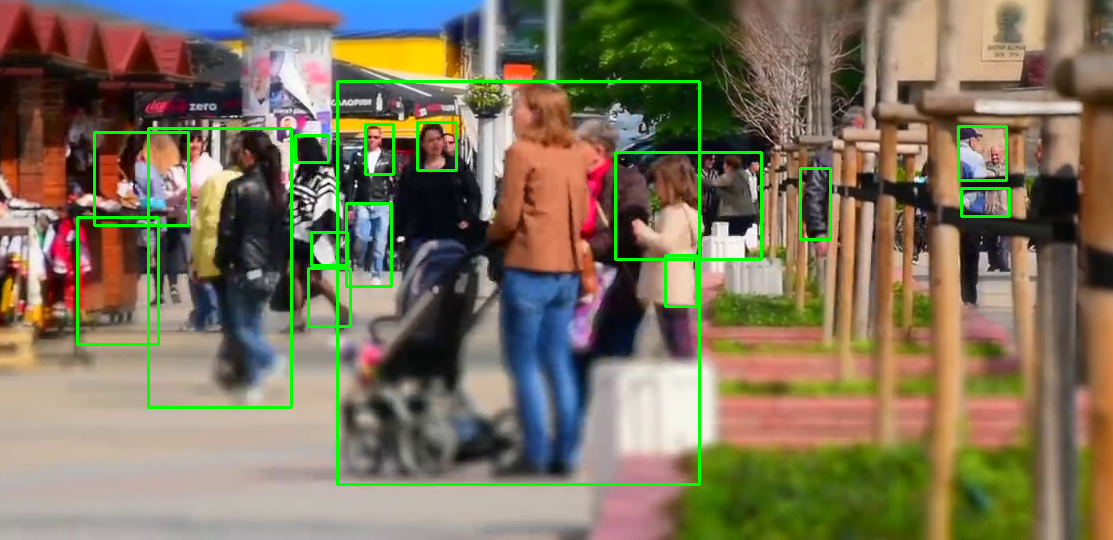

# Task 3
Facial Recognition to Check Fraud Cases

In [6]:
import cv2
import numpy as np

# Load reference image (suspect image) and convert to grayscale
reference_image_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\reftf.png" 
reference_image = cv2.imread(reference_image_path)
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Load video file
video_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\206779_tiny.mp4"  
cap = cv2.VideoCapture(video_path)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to extract facial features (e.g., eye spacing)
def extract_facial_features(face_image):
    # Convert to grayscale
    gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes within the face region
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    eyes = eye_cascade.detectMultiScale(gray)
    
    # If eyes are detected, extract their positions (this can be further refined)
    if len(eyes) >= 2:
        # Calculate eye spacing (distance between the center of the two eyes)
        eye_spacing = np.linalg.norm(np.array([eyes[0][0] + eyes[0][2] // 2, eyes[0][1] + eyes[0][3] // 2]) -
                                     np.array([eyes[1][0] + eyes[1][2] // 2, eyes[1][1] + eyes[1][3] // 2]))
        return eye_spacing
    else:
        return None

# Function to match facial features (e.g., compare eye spacing)
def compare_faces(features_ref, features_video):
    if features_ref is None or features_video is None:
        return False
    # Compare eye spacing (simple threshold-based comparison)
    eye_spacing_diff = abs(features_ref - features_video)
    return eye_spacing_diff < 30  # Adjust threshold as necessary

# Detect facial features in the reference image (suspect)
faces_ref = face_cascade.detectMultiScale(reference_gray, scaleFactor=1.1, minNeighbors=5)
features_ref = None
for (x, y, w, h) in faces_ref:
    face_roi_ref = reference_image[y:y+h, x:x+w]
    features_ref = extract_facial_features(face_roi_ref)

if features_ref is None:
    print("No suitable facial features found in the reference image.")
    exit()

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the video frame
    faces_video = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces_video:
        face_roi_video = frame[y:y+h, x:x+w]
        
        # Extract facial features from the detected face in the video frame
        features_video = extract_facial_features(face_roi_video)
        
        # Compare the extracted features with the reference image
        if compare_faces(features_ref, features_video):
            # If features match, draw a bounding box and label on the frame
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, "Suspect Matched", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    # Display the frame with potential matches
    cv2.imshow("Face Detection and Recognition", frame)
    
    # Exit the loop if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


reference image                    
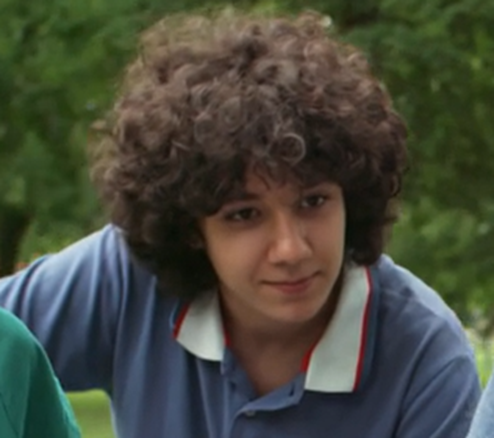

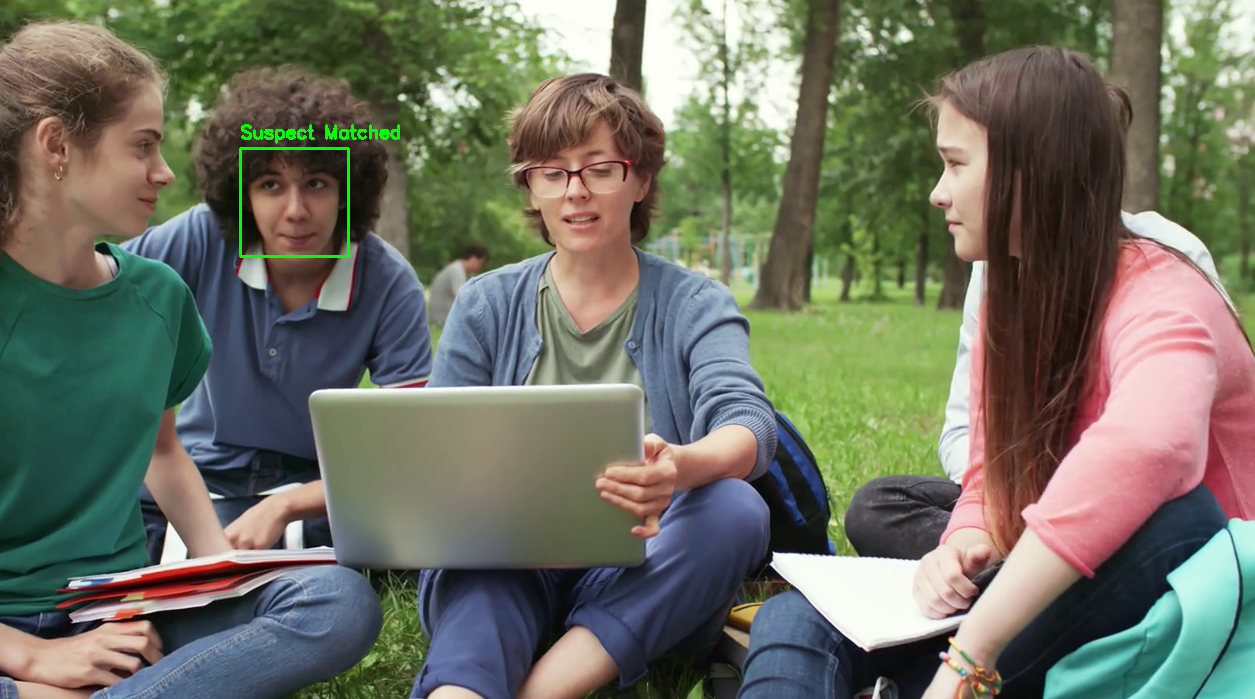

# Task 4
Number of People Entering and Exiting the Shop

In [19]:
import cv2
import numpy as np

# Load the video
video_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\25208-348661247_small.mp4"  
cap = cv2.VideoCapture(video_path)

# Initialize variables
people_entered = 0
people_exited = 0

# Set the ROI (Region of Interest) near the shop entrance for motion detection
roi_top_left = (150, 200)  # Top-left corner of the ROI (adjust based on your video)
roi_bottom_right = (700, 600)  # Bottom-right corner of the ROI (adjust based on your video)

# Define the background subtractor (for motion detection)
fgbg = cv2.createBackgroundSubtractorMOG2()

# Initialize the previous frame
prev_frame = None

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply background subtraction to detect motion
    fgmask = fgbg.apply(gray_frame)
    
    # Threshold the mask to remove noise and get binary motion map
    _, thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    
    # Define the ROI and crop the frame
    roi = frame[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]
    roi_thresh = thresh[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]
    
    # Find contours in the thresholded image to detect people (motion)
    contours, _ = cv2.findContours(roi_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a variable to track the center of moving objects
    detected = False
    
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours (noise)
            # Get bounding box for the moving object (person)
            x, y, w, h = cv2.boundingRect(contour)
            
            # Calculate the centroid of the contour
            center_x = x + w // 2
            center_y = y + h // 2
            
            # Check if the centroid is moving inward or outward
            if prev_frame is not None:
                # Use the previous frame to track direction (entry or exit)
                prev_centroid_x, prev_centroid_y = prev_frame
                
                # Check if the center is moving into or out of the ROI
                if prev_centroid_x < roi_top_left[0] and center_x >= roi_top_left[0]:
                    people_entered += 1
                elif prev_centroid_x >= roi_top_left[0] and center_x < roi_top_left[0]:
                    people_exited += 1
            
            # Save the current centroid as the previous frame for the next iteration
            prev_frame = (center_x, center_y)
            
            # Draw bounding box and label for detection
            cv2.rectangle(frame, (x + roi_top_left[0], y + roi_top_left[1]), (x + roi_top_left[0] + w, y + roi_top_left[1] + h), (0, 255, 0), 2)
            cv2.putText(frame, "Person", (x + roi_top_left[0], y + roi_top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    # Draw the ROI on the frame
    cv2.rectangle(frame, roi_top_left, roi_bottom_right, (255, 0, 0), 2)
    
    # Display the current count of people entered and exited
    cv2.putText(frame, f"Entered: {people_entered}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Exited: {people_exited}", (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Show the frame with motion and counting
    cv2.imshow("People Counting", frame)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(900) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


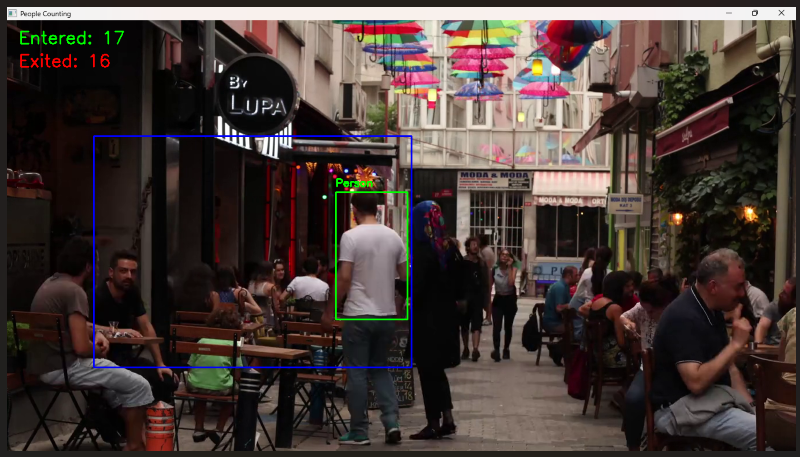

# Task 5
Dwelling Time in a Shopping Mall

In [24]:
import cv2
import time

# Load the video
video_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\21117-315137086_small.mp4"  
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Define the region of interest (ROI) in the video
roi_top_left = (100, 100)  # Top-left corner of the ROI
roi_bottom_right = (500, 300)  # Bottom-right corner of the ROI

# Initialize background subtractor for detecting moving objects
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=300, varThreshold=25, detectShadows=True)

# Variables to track people and their dwelling times
dwelling_times = {}
person_id_counter = 0
min_distance = 50  # Minimum distance to consider two detections as the same person

# Skip frames to reduce load
frame_skip = 5
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Skip frames to reduce processing load
    frame_count += 1
    if frame_count % frame_skip != 0:
        continue

    # Optionally resize the frame to reduce memory usage
    frame = cv2.resize(frame, (640, 360))

    # Define the ROI area (rescaled for the smaller frame)
    roi_frame = frame[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]
    cv2.rectangle(frame, roi_top_left, roi_bottom_right, (0, 255, 0), 2)

    # Apply background subtraction to the ROI
    fg_mask = bg_subtractor.apply(roi_frame)
    _, fg_mask = cv2.threshold(fg_mask, 244, 255, cv2.THRESH_BINARY)

    # Find contours in the foreground mask to detect people
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    current_frame_positions = []

    # Process each detected contour
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small detections
            (x, y, w, h) = cv2.boundingRect(contour)
            person_center = (roi_top_left[0] + x + w // 2, roi_top_left[1] + y + h // 2)
            current_frame_positions.append(person_center)

            # Check if this detected person is close to an already-tracked person
            person_id = None
            for pid, info in dwelling_times.items():
                # Calculate the distance between current detection and tracked person
                tracked_center = info['last_position']
                distance = ((person_center[0] - tracked_center[0]) ** 2 + (person_center[1] - tracked_center[1]) ** 2) ** 0.5

                if distance < min_distance:
                    person_id = pid
                    break

            # If no matching person is found, assign a new ID
            if person_id is None:
                person_id = person_id_counter
                dwelling_times[person_id] = {
                    "entry_time": time.time(),
                    "dwelling_time": 0,
                    "last_position": person_center
                }
                person_id_counter += 1

            # Update person's position and calculate dwelling time
            dwelling_times[person_id]["last_position"] = person_center
            dwelling_times[person_id]["dwelling_time"] = time.time() - dwelling_times[person_id]["entry_time"]

            # Draw bounding box and labels
            cv2.rectangle(frame, (roi_top_left[0] + x, roi_top_left[1] + y), 
                          (roi_top_left[0] + x + w, roi_top_left[1] + y + h), (0, 0, 255), 2)
            cv2.putText(frame, f"Person {person_id}", (person_center[0], person_center[1] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(frame, f"Time: {dwelling_times[person_id]['dwelling_time']:.1f} sec",
                        (person_center[0], person_center[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with annotations
    cv2.imshow("Dwelling Time Tracking", frame)

    # Break if 'q' is pressed
    if cv2.waitKey(300) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Print total dwelling time for each person tracked
print("Dwelling Times:")
for pid, times in dwelling_times.items():
    print(f"Person {pid}: {times['dwelling_time']:.2f} seconds")


Dwelling Times:
Person 0: 7.11 seconds
Person 1: 7.11 seconds
Person 2: 8.12 seconds
Person 3: 7.79 seconds
Person 4: 8.12 seconds
Person 5: 6.07 seconds
Person 6: 5.07 seconds
Person 7: 0.00 seconds
Person 8: 0.00 seconds
Person 9: 4.74 seconds
Person 10: 2.71 seconds
Person 11: 0.32 seconds
Person 12: 1.36 seconds
Person 13: 0.00 seconds


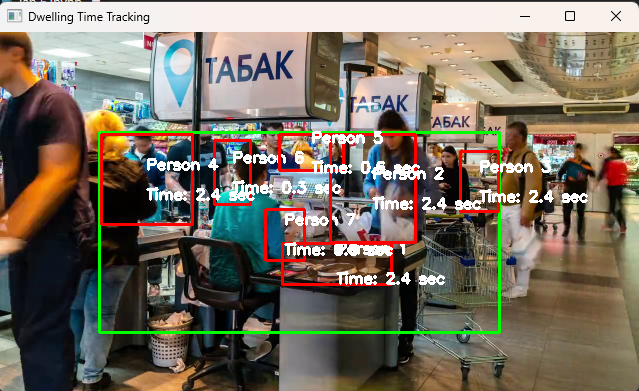

# Task 6
Spotting and Counting a Branded Car in a Video

In [37]:
import cv2
import numpy as np

# Load the video
video_path = r"D:\College\sem 7\Image and video analytics\lab\lab6\854671-sd_960_540_25fps.mp4"
cap = cv2.VideoCapture(video_path)

# Define the HSV color range for detecting white color
lower_white = np.array([0, 0, 180])  # Lower bound for white
upper_white = np.array([180, 40, 255])  # Upper bound for white

# Initialize background subtractor for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counters for white cars detected
color_car_count = 0

# List to store previously detected bounding boxes
previously_detected_boxes = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to HSV color space for better color segmentation
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the frame to get the regions with white color
    mask = cv2.inRange(hsv_frame, lower_white, upper_white)

    # Use the mask to extract the white regions from the original frame
    color_detected_frame = cv2.bitwise_and(frame, frame, mask=mask)

    # Convert the frame to grayscale for motion detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply background subtraction
    fg_mask = fgbg.apply(gray_frame)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours to detect moving objects (cars)
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Filter small contours (noise)
        if cv2.contourArea(contour) < 1000:
            continue
        
        # Get bounding box for the moving object (car)
        x, y, w, h = cv2.boundingRect(contour)
        
        # Create a tuple for the current bounding box
        current_box = (x, y, w, h)

        # Check if the current box is already detected (within a certain threshold)
        detected_before = False
        for prev_box in previously_detected_boxes:
            prev_x, prev_y, prev_w, prev_h = prev_box
            if (x < prev_x + prev_w and x + w > prev_x and y < prev_y + prev_h and y + h > prev_y):
                detected_before = True
                break
        
        if detected_before:
            continue  # Skip this box if it was detected before

        # Add the current box to the list of previously detected boxes
        previously_detected_boxes.append(current_box)

        # Draw bounding box around the detected car (use green for general detection)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green for detection

        # Extract the region of interest (ROI) to check for the detected color
        roi = color_detected_frame[y:y+h, x:x+w]
        
        # Check if there's a significant amount of white color detected in the ROI
        color_pixels = cv2.countNonZero(cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY))
        roi_area = w * h

        if color_pixels > roi_area * 0.3:  # If 30% of the ROI has the target white color
            color_car_count += 1
            # Draw a red rectangle around the detected white car
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red for white car

    # Display the frame with bounding boxes and detections
    cv2.putText(frame, f"Color Cars Detected: {color_car_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Color Car Detection", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

print(f"Total white Cars Detected: {color_car_count}")


Total white Cars Detected: 13


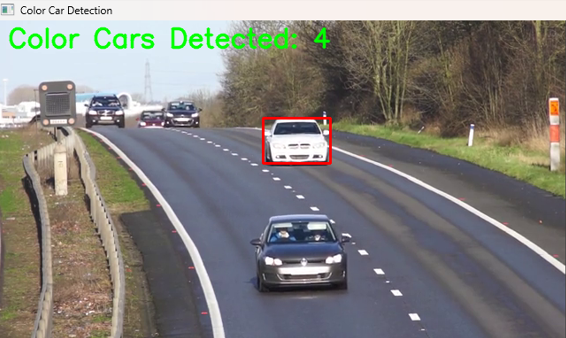